# A* Algorithm for Shortest Path Finding

# Author
Rizky Anggita S Siregar - 13519132 <br>
Wilson Tandya           - 13519228<br>
Institut Teknologi Bandung <br>
2021 <br>

In [1]:
# Run this cell for the first time
!pip3 install numpy
!pip3 install numpy
!pip3 install matplotlib
!pip3 install networkx
!pip3 install decorator==4.4.2
!pip3 install folium

You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 21.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import os
import math
import queue
from queue import PriorityQueue
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import folium
from folium import plugins
from Graph import Graph
from Utility import add_graph_from_txt, SearchIdxNode

In [4]:
# ------Main Program-------

filename = input(str("Masukkan nama file: "))
filename = filename+".txt"
a = os.path.abspath(os.curdir)

if os.name=='nt':
    file_path = os.path.join("..\\test", filename)
else:
    a = a[:-3]
    file_path = os.path.join(a, "test", filename)

f = open(file_path, "r")

nNodes = int(f.readline())
nodeCoordinate = []
g2 = Graph(nNodes)
nodeCoordinate = add_graph_from_txt(g2, nodeCoordinate, f, nNodes)
daftarNode = g2.nodes

print("Daftar Titik yang dapat dikunjungi: ")
print(daftarNode)

From = input(str("Asal  : "))
To = input(str("Tujuan  : "))

while (From not in daftarNode or To not in daftarNode):
    print("Node tidak terdapat pada graph, silahkan input ulang!")
    From = input(str("Asal:"))
    To = input(str("Tujuan:"))

found, solusi, gn = g2.AStar(From, To, nodeCoordinate)

if not found:
    print("Lintasan tidak dapat ditemukan!")
else:
    print("Solusi A*: ", end = "")
    for i in range (len(solusi)):
        if (i != len(solusi) - 1):
            print(solusi[i], end = " → ")
        else:
            print(solusi[i])
    print("Jarak tempuh: ", gn[g2.nodes.index(To)])

    # Visualizing route with Folium
    #Koordinat lokasi dari file eksternal
    coordinates = []  
    for i in (nodeCoordinate):
        coordinates.append(i)

    name = []
    for i in (g2.nodes):
        name.append(i)

    latitude = []
    longitude = []
    for i in range(len(coordinates)):
        latitude.append(coordinates[i][0])
        longitude.append(coordinates[i][1])

    #Koordinat jalur shortest path
    mapHasil = []
    for i in range (len(solusi)):
        mapHasil.append(nodeCoordinate[SearchIdxNode(solusi[i], g2)])
        

    visualisasiMap = folium.Map(location=coordinates[0], zoom_start=16)
    for index,lat in enumerate(latitude):
        folium.Marker([lat,
        longitude[index]],
        popup=('{} \n'.format(name[index])),
        icon = folium.Icon(color='blue'), tooltip=name[index]).add_to(visualisasiMap)
        #Buat Ant Path dari jalur yang ditempuh
        plugins.AntPath(locations=mapHasil,weight=5, color = "green").add_to(visualisasiMap)


Daftar Titik yang dapat dikunjungi: 
['BigBen', 'PerempatanParliamentSquare', '10DowningStreet', 'TragalgarSquare', 'PertigaanTheMall', 'PertigaanBirdcage', 'PertigaanBuckingham', 'BuckinghamPalace']
Lintasan tidak dapat ditemukan!


C:\Users\wilso\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\wilso\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


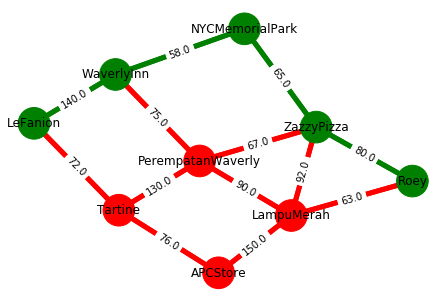

In [4]:
# Visualizing the graph with weighted edges as distance between two nodees
g2.visualize_graph(solusi)

In [5]:
# Visualize map and its shortest route with Folium
visualisasiMap